In [7]:
import cx_Oracle #오라클 연동 모듈
#오라클 서버에 접속 :     아이디/비번@호스트:포트번호/sid
conn= cx_Oracle.connect("hr/hr@localhost:1521/xe")
#커서 생성
cursor = conn.cursor()
#sql 명령어 실행
# rownum : 결과셋의 레코드 출력 순번
cursor.execute('select * from ontime where rownum < 5')
#결과셋을 리스트로 저장
rows = cursor.fetchall()
for row in rows:
    print(row)
# 리소스 정리
cursor.close()
conn.close()

(2008, 1, 3, 4, '2003', 1955, '2211', 2225, 'WN', '335', 'N712SW', '128', '150', '116', '-14', '8', 'IAD', 'TPA', '810', '4', '8', '0', None, '0', 'NA', 'NA', 'NA', 'NA', 'NA')
(2008, 1, 3, 4, '754', 735, '1002', 1000, 'WN', '3231', 'N772SW', '128', '145', '113', '2', '19', 'IAD', 'TPA', '810', '5', '10', '0', None, '0', 'NA', 'NA', 'NA', 'NA', 'NA')
(2008, 1, 3, 4, '628', 620, '804', 750, 'WN', '448', 'N428WN', '96', '90', '76', '14', '8', 'IND', 'BWI', '515', '3', '17', '0', None, '0', 'NA', 'NA', 'NA', 'NA', 'NA')
(2008, 1, 3, 4, '926', 930, '1054', 1100, 'WN', '1746', 'N612SW', '88', '90', '78', '-6', '-4', 'IND', 'BWI', '515', '3', '7', '0', None, '0', 'NA', 'NA', 'NA', 'NA', 'NA')


In [8]:
import cx_Oracle
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")

cursor = conn.cursor()
#항공사코드별 평균출발지연시간
cursor.execute('''select uniquecarrier, avg(depdelay)
from ontime
group by uniquecarrier
order by avg(depdelay)''')
rows = cursor.fetchall()
for row in rows:
    print(row) #print('{}\t{}'.format(row[0],row[1]))
    
cursor.close()
conn.close()

('AQ', -1.3902564102564103)
('HA', 0.4510561899524472)
('US', 5.635456327203702)
('F9', 5.901056786616821)
('NW', 6.409786223004613)
('9E', 6.5856228642909445)
('AS', 6.752723325965242)
('OO', 7.2952999070807305)
('DL', 7.887967410954327)
('FL', 9.183920300820837)
('WN', 10.276262862449386)
('MQ', 10.29978622071234)
('XE', 11.093709113241301)
('OH', 11.16054087152783)
('YV', 11.572015847487545)
('EV', 11.711389111645728)
('B6', 12.447679903718171)
('AA', 12.899916513056201)
('CO', 13.023581444438861)
('UA', 13.784372045426737)


In [9]:
import cx_Oracle
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")

cursor = conn.cursor()
# 항공사 평균도착지연시간
cursor.execute('''select uniquecarrier,description, avg(arrdelay) delay
from ontime o , carrier c
where uniquecarrier = c.code
group by uniquecarrier,description
order by delay desc''')
rows = cursor.fetchall()
for row in rows:
    print(row)
cursor.close()
conn.close()

('AA', 'American Airlines Inc.', 12.202853434950445)
('OH', 'Comair Inc.', 11.404110178283158)
('YV', 'Mesa Airlines Inc.', 11.322566979170753)
('UA', 'United Air Lines Inc.', 11.001550560048052)
('B6', 'JetBlue Airways', 10.859381613638567)
('CO', 'Continental Air Lines Inc.', 10.809820575966226)
('XE', 'Expressjet Airlines Inc.', 10.320298523403915)
('EV', 'Atlantic Southeast Airlines', 10.00033146217589)
('MQ', 'American Eagle Airlines Inc.', 9.496970610952266)
('FL', 'AirTran Airways Corporation', 8.988157472371256)
('DL', 'Delta Air Lines Inc.', 7.716164635751918)
('NW', 'Northwest Airlines Inc.', 7.293465879672776)
('OO', 'Skywest Airlines Inc.', 6.43893863978179)
('F9', 'Frontier Airlines Inc.', 6.084135669681085)
('WN', 'Southwest Airlines Co.', 5.115703380225903)
('AS', 'Alaska Airlines Inc.', 4.721360405553864)
('9E', 'Pinnacle Airlines Inc.', 3.987490846961191)
('US', 'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)', 2.800998260539828)
('

In [10]:
import cx_Oracle
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")

cursor = conn.cursor()
cursor.execute('''
select month,count(*)
from ontime
where arrdelay>0
group by month
order by month
''')
rows = cursor.fetchall()
for row in rows:
    print(row)
    
cursor.close()
conn.close()

(1, 279427)
(2, 278902)
(3, 294556)
(4, 256142)
(5, 254673)
(6, 295897)
(7, 264630)
(8, 239737)
(9, 169959)
(10, 183582)
(11, 181506)
(12, 280493)


In [11]:
x = list(range(1,13)) #1~12
y=[]
for row in rows:
    y.append(row[1]) # y리스트에 자료 추가
    
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[279427, 278902, 294556, 256142, 254673, 295897, 264630, 239737, 169959, 183582, 181506, 280493]


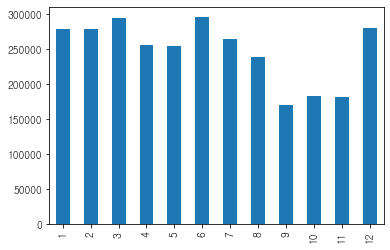

In [12]:
import pandas as pd #판다스 패키지 로딩
#그래프 출력 옵션
%matplotlib inline 

s1=pd.Series(y,index=x) #시리즈 타입으로 변환
s1.plot(kind='bar') #막대 그래프 출력

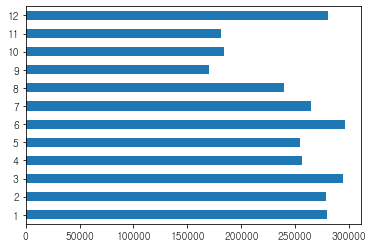

In [13]:
s1.plot(kind='barh')

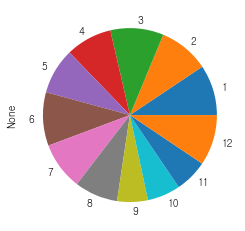

In [14]:
s1.plot(kind='pie')

In [15]:
import cx_Oracle
conn = cx_Oracle.connect('hr/hr@localhost:1521/xe')

cursor = conn.cursor()
cursor.execute('''select dayofweek, avg(arrdelay)
from ontime
group by dayofweek
order by dayofweek''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 8.030254747872275)
(2, 7.29232332960935)
(3, 6.379804071503802)
(4, 8.246549198623555)
(5, 10.675214410055972)
(6, 5.682499626837823)
(7, 9.294087238339747)


In [16]:
# x =['월','화','수','목','금','토','일']
y = []
for row in rows:
    y.append(row[1])
#print(x)
print(y)

[8.030254747872275, 7.29232332960935, 6.379804071503802, 8.246549198623555, 10.675214410055972, 5.682499626837823, 9.294087238339747]


Text(0.5, 1.0, '요일별 통계')

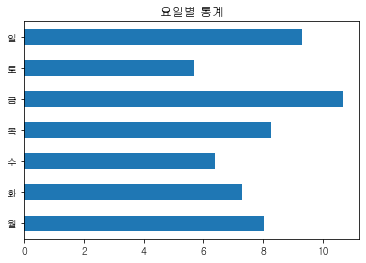

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc, font_manager
#한글 폰트 설정
font_name=font_manager.FontProperties(
fname='c:/windows/fonts/gulim.ttc').get_name()
rc('font',family=font_name)
s1=pd.Series(y,index=['월','화','수','목','금','토','일'])
s1.plot(kind='barh') #가로막대 그래프
plt.title('요일별 통계') #그래프 제목

In [22]:
import cx_Oracle
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")

cursor = conn.cursor()
#10월, 월요일 중에서 가장 좋은 시간대
cursor.execute('''select CRSDepTime, avg(arrdelay) delay
from ontime
where month=10 and dayofweek=1 
group by CRSDepTime
order by delay
''')
rows = cursor.fetchall()
for row in rows[:5]:
    print(row)
    
cursor.close()
conn.close()

(2202, -28)
(2216, -22.25)
(1807, -20)
(2154, -17.666666666666668)
(1948, -16)


In [25]:
import cx_Oracle
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")

cursor = conn.cursor()
#10월, 월요일 중에서 가장 좋은 시간대
# rownum : order by 전까지의 출력순번
# order by 명령어가 실행되면 rownum이 바뀌게됨
# rownum을 매기기 전에 먼저 정렬을 하고 rownum을 부여하는 방식
# 서브쿼리
# A* A테이블의 모든 필드
cursor.execute('''
select*
from(
    select rownum as rn, A.*
    from (
        select CRSDepTime, avg(arrdelay) delay
        from ontime
        where month=10 and dayofweek=1
        group by CRSDepTime
        order by delay
    ) A
) where rn between 1 and 10
''')
rows = cursor.fetchall()
for row in rows:
    print(row)
    
cursor.close()
conn.close()

(1, 2202, -28)
(2, 2216, -22.25)
(3, 1807, -20)
(4, 2154, -17.666666666666668)
(5, 1948, -16)
(6, 2253, -15.75)
(7, 2148, -15.571428571428571)
(8, 551, -15.5)
(9, 2212, -15.4)
(10, 2104, -15.375)
